In [2]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import dask_jobqueue
from astropy.convolution import Box2DKernel, convolve
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
import matplotlib.colors as colors
import pandas as pd
from fix_grid import fix_grid 

# abs anomalies

In [3]:
pathp='/gxfs_home/geomar/smomw577/plots/Boxcar/0181-0190/'
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/'
dsa=xr.open_dataset(pathf+'3x3box_anomaly_monthly_0181-0190_noice.nc', chunks='auto')
dsa_cc=xr.open_dataset(pathf+'3x3box_anomaly_monthly_1PctTo2X_0181-0190_noice.nc', chunks='auto')
ds=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/mean_std_control.nc', chunks='auto')
ds_cc=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/mean_std_1PctTo2X.nc', chunks='auto')
dsa=fix_grid(dsa)
ds=fix_grid(ds)

dsa_cc=fix_grid(dsa_cc)
ds_cc=fix_grid(ds_cc)

In [4]:
co2=abs(dsa.dic_stf)
o2=abs(dsa.o2_stf)

co2_cc=abs(dsa_cc.dic_stf)
o2_cc=abs(dsa_cc.o2_stf)

co2=co2.mean(dim='time')
o2=o2.mean(dim='time')

co2_cc=co2_cc.mean(dim='time')
o2_cc=o2_cc.mean(dim='time')

dif=co2/o2

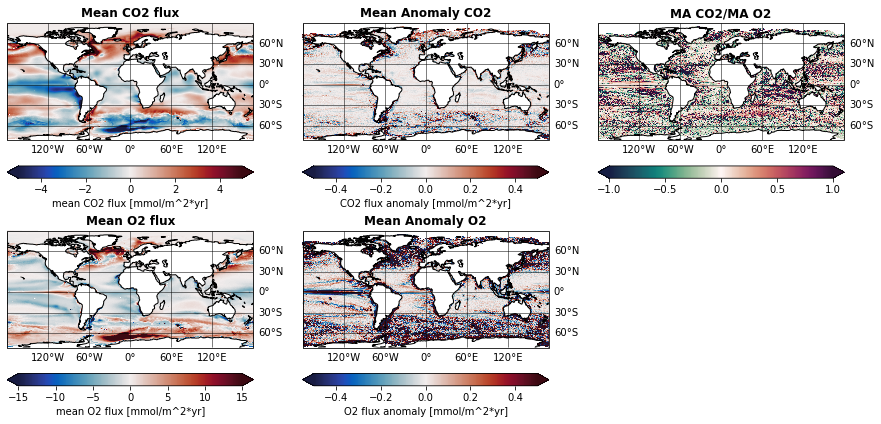

In [12]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(15,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
ds.dic_stf_mean.plot(ax=axs[0],vmin=-5, vmax=5, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "mean CO2 flux [mmol/m^2*yr]"})
ds.o2_stf_mean.plot(ax=axs[3], vmin=-15, vmax=15, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "mean O2 flux [mmol/m^2*yr]"})

dsa.dic_stf.mean(dim='time').plot(ax=axs[1],vmin=-.5, vmax=.5, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "CO2 flux anomaly [mmol/m^2*yr]"})
dsa.o2_stf.mean(dim='time').plot(ax=axs[4], vmin=-.5, vmax=.5, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "O2 flux anomaly [mmol/m^2*yr]"})

(dsa.dic_stf.mean(dim='time')/dsa.o2_stf.mean(dim='time')).plot(ax=axs[2],vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.curl, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})



for i in range(5):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Mean CO2 flux', fontweight='bold');
axs[3].set_title('Mean O2 flux', fontweight='bold');
axs[4].set_title('Mean Anomaly O2', fontweight='bold');
axs[1].set_title('Mean Anomaly CO2', fontweight='bold');
axs[2].set_title('MA CO2/MA O2', fontweight='bold');

axs[5].set_axis_off()

plt.savefig(pathp+'co2_o2_MA.png', dpi=300, bbox_inches='tight');

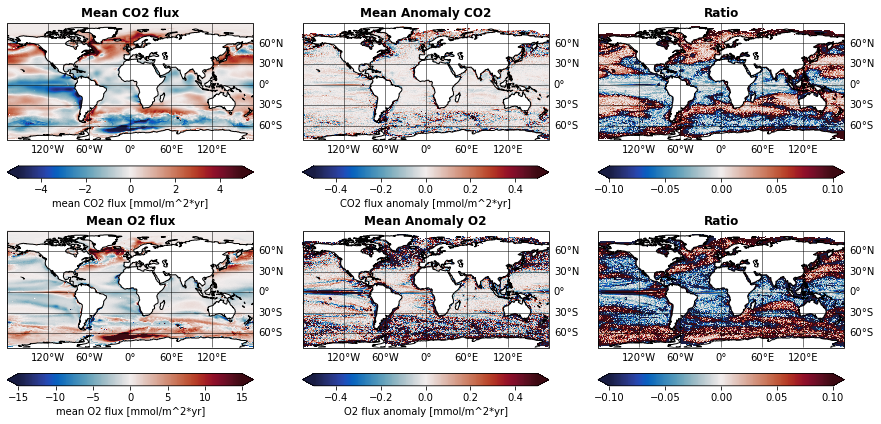

In [5]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(15,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
ds.dic_stf_mean.plot(ax=axs[0],vmin=-5, vmax=5, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "mean CO2 flux [mmol/m^2*yr]"})
ds.o2_stf_mean.plot(ax=axs[3], vmin=-15, vmax=15, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "mean O2 flux [mmol/m^2*yr]"})

dsa.dic_stf.mean(dim='time').plot(ax=axs[1],vmin=-.5, vmax=.5, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "CO2 flux anomaly [mmol/m^2*yr]"})
dsa.o2_stf.mean(dim='time').plot(ax=axs[4], vmin=-.5, vmax=.5, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "O2 flux anomaly [mmol/m^2*yr]"})


(abs(dsa.dic_stf.mean(dim='time'))/ds.dic_stf_mean).plot(ax=axs[2],vmin=-.1, vmax=.1,  x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})
(abs(dsa.o2_stf.mean(dim='time'))/ds.o2_stf_mean).plot(ax=axs[5]  ,vmin=-.1, vmax=.1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})



for i in range(6):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Mean CO2 flux', fontweight='bold');
axs[3].set_title('Mean O2 flux', fontweight='bold');
axs[4].set_title('Mean Anomaly O2', fontweight='bold');
axs[1].set_title('Mean Anomaly CO2', fontweight='bold');
axs[2].set_title('Ratio', fontweight='bold');
axs[5].set_title('Ratio', fontweight='bold');

plt.savefig(pathp+'co2_o2_MAR.png', dpi=300, bbox_inches='tight');

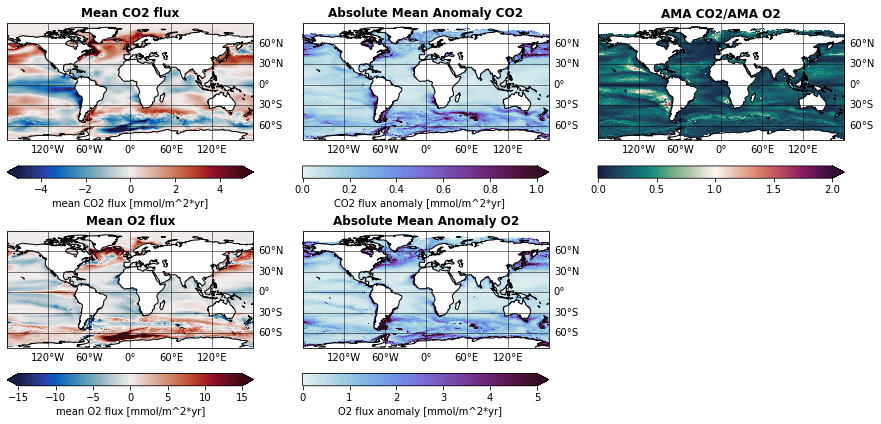

In [5]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(15,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
ds.dic_stf_mean.plot(ax=axs[0],vmin=-5, vmax=5, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "mean CO2 flux [mmol/m^2*yr]"})
ds.o2_stf_mean.plot(ax=axs[3], vmin=-15, vmax=15, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "mean O2 flux [mmol/m^2*yr]"})

co2.plot(ax=axs[1],vmin=0, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.dense, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "CO2 flux anomaly [mmol/m^2*yr]"})
o2.plot(ax=axs[4], vmin=0, vmax=5, x='geolon_t', y='geolat_t', cmap=cmo.dense, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "O2 flux anomaly [mmol/m^2*yr]"})

dif.plot(ax=axs[2],vmin=0, vmax=2, x='geolon_t', y='geolat_t', cmap=cmo.curl, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

for i in range(5):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Mean CO2 flux', fontweight='bold');
axs[3].set_title('Mean O2 flux', fontweight='bold');
axs[4].set_title('Absolute Mean Anomaly O2', fontweight='bold');
axs[1].set_title('Absolute Mean Anomaly CO2', fontweight='bold');
axs[2].set_title('AMA CO2/AMA O2', fontweight='bold');

axs[5].set_axis_off()
plt.savefig(pathp+'co2_o2_AMA.png', dpi=300, bbox_inches='tight');

## bar plots

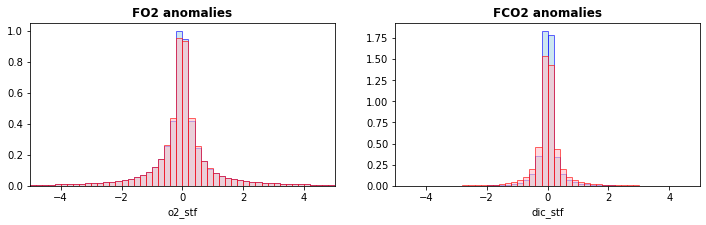

In [35]:
fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(12,3))
### median und mean
dsa.o2_stf.where(dsa.o2_stf<=8).where(dsa.o2_stf>=-8).plot.hist(ax=axs[0],xlim=[-5,5], bins=80, color='lightblue',alpha=.6, edgecolor='blue', density=True);
dsa_cc.o2_stf.where(dsa_cc.o2_stf<=8).where(dsa_cc.o2_stf>=-8).plot.hist(ax=axs[0], xlim=[-5,5], bins=80, color='pink',alpha=.6, edgecolor='red', density=True);
axs[0].set_title('FO2 anomalies', fontweight='bold')

dsa.dic_stf.where(dsa.dic_stf<=8).where(dsa.dic_stf>=-8).plot.hist(ax=axs[1], xlim=[-5,5], bins=80, color='lightblue',alpha=.6, edgecolor='blue', density=True);
dsa_cc.dic_stf.where(dsa_cc.dic_stf<=8).where(dsa_cc.dic_stf>=-8).plot.hist(ax=axs[1],xlim=[-5,5], bins=80, color='pink',alpha=.6, edgecolor='red', density=True);
axs[1].set_title('FCO2 anomalies', fontweight='bold')

plt.savefig(pathp+'flux_pdf.png', dpi=300, bbox_inches='tight');

In [16]:
###calc globally avgd effect
weights = np.cos(np.deg2rad(dsa.o2_stf.yt_ocean))
weights.name = "weights"
co2_w = dsa.dic_stf.weighted(weights)
co2_wma = co2_w.mean(("xt_ocean", "yt_ocean", "time"))
co2_wma.name='FCO2 anomalies ctrl'

co2_cc_w = dsa_cc.dic_stf.weighted(weights)
co2_cc_wma = co2_cc_w.mean(("xt_ocean", "yt_ocean", "time"))
co2_cc_wma.name='FCO2 anomalies 1PctTo2X'

o2_w = dsa.o2_stf.weighted(weights)
o2_wma = o2_w.mean(("xt_ocean", "yt_ocean", "time"))
o2_wma.name='FO2 anomalies ctrl'

o2_cc_w = dsa_cc.o2_stf.weighted(weights)
o2_cc_wma = o2_cc_w.mean(("xt_ocean", "yt_ocean", "time"))
o2_cc_wma.name='FO2 anomalies 1PctTo2X'


In [17]:
print(co2_wma, co2_cc_wma, o2_wma, o2_cc_wma)

<xarray.DataArray 'FCO2 anomalies ctrl' ()>
array(-0.00352495) <xarray.DataArray 'FCO2 anomalies 1PctTo2X' ()>
array(-0.0057699) <xarray.DataArray 'FO2 anomalies ctrl' ()>
array(0.00222405) <xarray.DataArray 'FO2 anomalies 1PctTo2X' ()>
array(0.00179262)


### box plots

In [10]:
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/'
dsa=xr.open_dataset(pathf+'3x3box_anomaly_monthly_0181-0190.nc')


In [26]:
test=xr.merge([dsa.SST[::, ::10,::10], dsa['sens_heat'][::, ::10,::10], dsa['evap_heat'][::, ::10,::10], dsa['o2_stf'][::, ::10,::10], dsa['dic_stf'][::, ::10,::10]])
#step1=np.arange(-3,-2, .5)
step2=np.arange(-3,3, .25)
#step3=np.arange(2,4.5,.5)
step=np.concatenate((step1,step2,step3))

In [29]:
test=test.to_dataframe()

In [30]:
bins = pd.cut(test['SST'], step2)
test['bins'] = bins

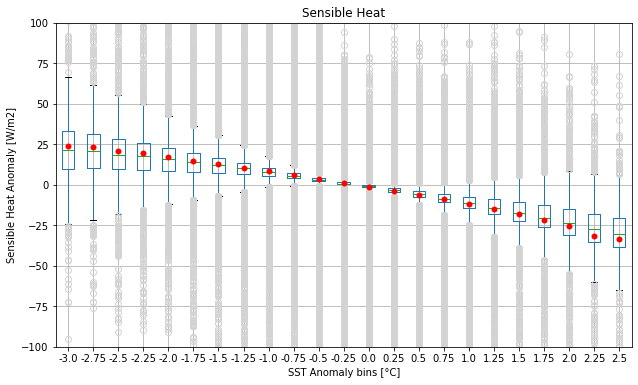

In [32]:
flierprops = dict(marker='o', markerfacecolor='none', markersize=6,markeredgecolor='lightgray')
meanpointprops = dict(marker='o', markeredgecolor='none',
                      markerfacecolor='red')

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(10,6))
test.boxplot(ax=ax, column="sens_heat", by='bins', showmeans=True, flierprops=flierprops,meanprops=meanpointprops)
ax.set_xticklabels(list(step2[:-1]));
ax.set_title('Sensible Heat')
ax.set_xlabel('SST Anomaly bins [°C]')
ax.set_ylabel('Sensible Heat Anomaly [W/m2]')
fig.suptitle('')

ax.set_ylim([-100,100])
plt.savefig(pathp+'sens_heat_boxplot_crop.png', dpi=300, bbox_inches='tight');

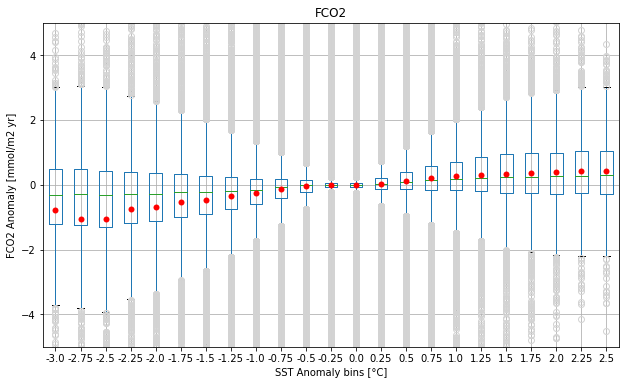

In [44]:
flierprops = dict(marker='o', markerfacecolor='none', markersize=6,markeredgecolor='lightgray')
meanpointprops = dict(marker='o', markeredgecolor='none',
                      markerfacecolor='red')

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(10,6))
test.boxplot(ax=ax, column="dic_stf", by='bins', showmeans=True, flierprops=flierprops,meanprops=meanpointprops)
ax.set_xticklabels(list(step2[:-1]));
ax.set_title('FCO2')
ax.set_xlabel('SST Anomaly bins [°C]')
ax.set_ylabel('FCO2 Anomaly [mmol/m2 yr]')
fig.suptitle('')

ax.set_ylim([-5,5])
plt.savefig(pathp+'dic_stf_boxplot_crop.png', dpi=300, bbox_inches='tight');

# oder als global average?

In [10]:
######anomalies
weights = np.cos(np.deg2rad(dsa.dic_stf.yt_ocean))
weights.name = "weights"

#co2_w = co2.weighted(weights)
co2_w = dsa.dic_stf.mean(dim='time').weighted(weights)
co2_wma = co2_w.mean(("xt_ocean", "yt_ocean"))
co2_wma.name='FCO2 anomalies ctrl'

#co2_cc_w = co2_cc.weighted(weights)
co2_cc_w = dsa_cc.dic_stf.mean(dim='time').weighted(weights)
co2_cc_wma = co2_cc_w.mean(("xt_ocean", "yt_ocean"))
co2_cc_wma.name='FCO2 anomalies 1PctTo2X'

#o2_w = o2.weighted(weights)
o2_w = dsa.o2_stf.mean(dim='time').weighted(weights)
o2_wma = o2_w.mean(("xt_ocean", "yt_ocean"))
o2_wma.name='FO2 anomalies ctrl'

#o2_cc_w = o2_cc.weighted(weights)
o2_cc_w = dsa_cc.o2_stf.mean(dim='time').weighted(weights)
o2_cc_wma = o2_cc_w.mean(("xt_ocean", "yt_ocean"))
o2_cc_wma.name='FO2 anomalies 1PctTo2X'


#####absolute
co2_w = ds.dic_stf_mean.weighted(weights)
co2_wm = co2_w.mean(("xt_ocean", "yt_ocean"))
co2_wm.name='FCO2 ctrl'

co2_cc_w = ds_cc.dic_stf_mean.weighted(weights)
co2_cc_wm = co2_cc_w.mean(("xt_ocean", "yt_ocean"))
co2_cc_wm.name='FCO2 1PctTo2X'

o2_w = ds.o2_stf_mean.weighted(weights)
o2_wm = o2_w.mean(("xt_ocean", "yt_ocean"))
o2_wm.name='FO2 ctrl'

o2_cc_w = ds_cc.o2_stf_mean.weighted(weights)
o2_cc_wm = o2_cc_w.mean(("xt_ocean", "yt_ocean"))
o2_cc_wm.name='FO2 1PctTo2X'

ctrla=[float(o2_wma.values), float(co2_wma.values)]
clima=[float(o2_cc_wma.values), float(co2_cc_wma.values)]

ctrl=[float(o2_wm.values), float(co2_wm.values)]
clim=[float(o2_cc_wm.values), float(co2_cc_wm.values)]


index = ['FO2', 'FCO2']

dfa = pd.DataFrame({'ctrl': ctrla,
                   '1PctTo2X': clima}, index=index)


df = pd.DataFrame({'ctrl': ctrl,
                   '1PctTo2X': clim}, index=index)



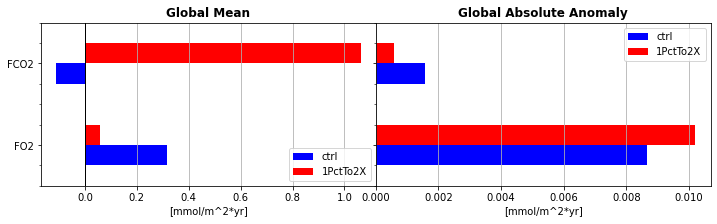

In [14]:
fig,axs=plt.subplots(1,2, figsize=(12,3), sharey=True)


axs[0].set_title('Global Mean', fontweight='bold')
df.plot.barh(ax=axs[0], color=['blue', 'red'])
axs[0].set_xlabel('[mmol/m^2*yr]')
axs[0].axvline(0, c='black', linewidth=1)

axs[1].set_title('Global Absolute Anomaly', fontweight='bold')
dfa.plot.barh(ax=axs[1], color=['blue', 'red'])
axs[1].set_xlabel('[mmol/m^2*yr]');
axs[0].xaxis.grid()
axs[1].xaxis.grid()
plt.subplots_adjust(wspace=0)
plt.savefig(pathp+'barplot_MA.png', dpi=300, bbox_inches='tight');

# chlo

In [53]:
raw='/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5/control/'
ds_all=xr.open_dataset(raw+'01810101.ocean_minibling_surf_field.nc')
ds_corr=xr.open_dataset(pathf+'3x3box_corr_monthly_1PctTo2X_0181-0190.nc')

ds_all=fix_grid(ds_all)
ds_corr=fix_grid(ds_corr)

In [64]:
chl=ds_all.chl.mean(dim='time')

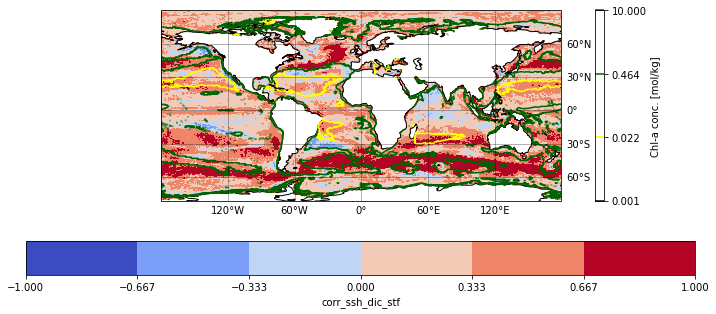

In [112]:
lev_exp = np.linspace(-3,1, 4)
levs = np.power(10, lev_exp)

fig, axs= plt.subplots(nrows=1, ncols=1 , figsize=(12,5),subplot_kw={'projection': ccrs.PlateCarree()})

ds_corr.corr_ssh_dic_stf.plot.contourf(vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap='coolwarm', transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})
cs = plt.contour(chl.geolon_t, chl.geolat_t,chl,  levs, colors=['black', 'yellow','darkgreen', 'purple'],norm=colors.LogNorm(), transform = ccrs.PlateCarree())
cbar = plt.colorbar(cs,label='Chl-a conc. [mol/kg]')
#axs.clabel(cs, inline=True)

gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', alpha=0.3)
gl.xlabels_top = False
gl.ylabels_left = False
axs.coastlines();
plt.savefig(pathp+'corr_ssh_co2_chl.png', dpi=300);

# monthly 0181-0190 control

In [20]:
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/'
pathp='/gxfs_home/geomar/smomw577/plots/Boxcar/0181-0190/'
dsa=xr.open_dataset(pathf+'3x3box_anomaly_monthly_0181-0190.nc')

In [6]:
dsa=fix_grid(dsa)

In [3]:
sh=dsa.sens_heat
lh=dsa.evap_heat
o2=dsa.o2_stf
dic=dsa.dic_stf
ssh=dsa.SSH
sst=dsa.SST

## correlations

### SSH corr

In [5]:
ds_corr=fix_grid(ds_corr)

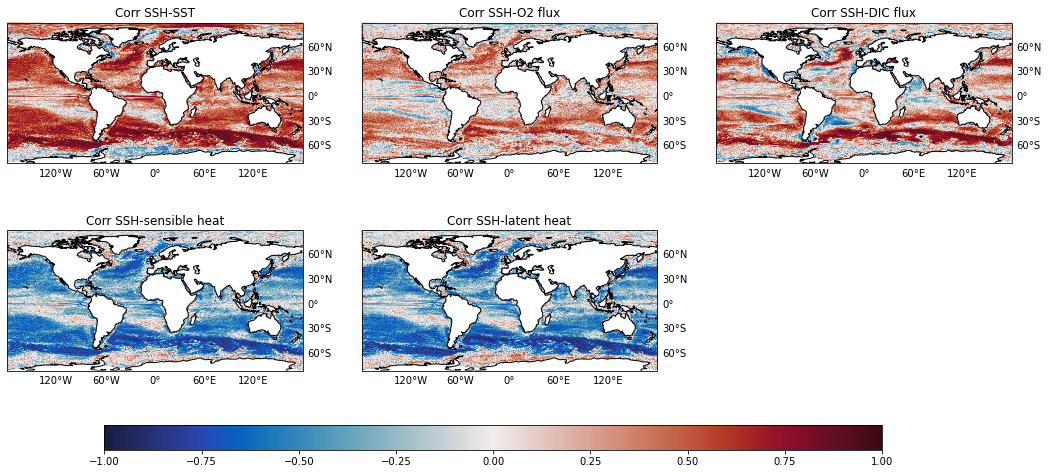

In [6]:
###SSH corrs
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
im =ds_corr.corr_ssh_SST.plot(ax=axs[0], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_ssh_sens_heat.plot(ax=axs[3], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_ssh_evap_heat.plot(ax=axs[4], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_ssh_o2_stf.plot(ax=axs[1], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_ssh_dic_stf.plot(ax=axs[2], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
axs[5].set_axis_off()

for i in range(5):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

axs[0].set_title('Corr SSH-SST');
axs[3].set_title('Corr SSH-sensible heat');
axs[4].set_title('Corr SSH-latent heat');
axs[1].set_title('Corr SSH-O2 flux');
axs[2].set_title('Corr SSH-DIC flux');
#plt.savefig(pathp+'3x3box_corr_monthly_0181-0190.png', bbox_inches="tight", dpi=300)
plt.savefig(pathp+'3x3box_corr_monthly_1PctTo2X_0181-0190.png', bbox_inches="tight", dpi=300)

In [ ]:
###SSH corrs
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
im =ds_corr.corr_ssh_SST.plot.contourf(ax=axs[0], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr.corr_ssh_sens_heat.plot.contourf(ax=axs[3], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr.corr_ssh_evap_heat.plot.contourf(ax=axs[4], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr.corr_ssh_o2_stf.plot.contourf(ax=axs[1], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr.corr_ssh_dic_stf.plot.contourf(ax=axs[2], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
axs[5].set_axis_off()

for i in range(5):
    #axs[i].yaxis.tick_right()
    #axs[i].set_xticks([-180,-120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    #axs[i].set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    #lon_formatter = LongitudeFormatter(zero_direction_label=True)
    #lat_formatter = LatitudeFormatter()
    #axs[i].xaxis.set_major_formatter(lon_formatter)
    #axs[i].yaxis.set_major_formatter(lat_formatter)

    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

axs[0].set_title('Corr SSH-SST');
axs[3].set_title('Corr SSH-sensible heat');
axs[4].set_title('Corr SSH-latent heat');
axs[1].set_title('Corr SSH-O2 flux');
axs[2].set_title('Corr SSH-DIC flux');
plt.savefig(pathp+'3x3box_corr_contourf_monthly_1PctTo2X_0181-0190.png', bbox_inches="tight", dpi=300)
#plt.savefig(pathp+'3x3box_corr_contourf_monthly_0181-0190.png', bbox_inches="tight", dpi=300)

In [ ]:
###SST corrs
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
im =ds_corr.corr_sst_SSH.plot(ax=axs[0], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_sst_sens_heat.plot(ax=axs[3], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_sst_evap_heat.plot(ax=axs[4], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_sst_o2_stf.plot(ax=axs[1], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_sst_dic_stf.plot(ax=axs[2], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
axs[5].set_axis_off()

for i in range(5):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

axs[0].set_title('Corr SST-SSH');
axs[3].set_title('Corr SST-sensible heat');
axs[4].set_title('Corr SST-latent heat');
axs[1].set_title('Corr SST-O2 flux');
axs[2].set_title('Corr SST-DIC flux');

plt.savefig(pathp+'3x3box_sstcorr_monthly_1PctTo2X_0181-0190.png', bbox_inches="tight", dpi=300)
#plt.savefig(pathp+'3x3box_sstcorr_monthly_0181-0190.png', bbox_inches="tight", dpi=300)

In [ ]:
###SST corrs
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
im =ds_corr.corr_sst_SSH.plot.contourf(ax=axs[0], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_sst_sens_heat.plot.contourf(ax=axs[3], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_sst_evap_heat.plot.contourf(ax=axs[4], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_sst_o2_stf.plot.contourf(ax=axs[1], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_sst_dic_stf.plot.contourf(ax=axs[2], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
axs[5].set_axis_off()

for i in range(5):
    #axs[i].yaxis.tick_right()
    #axs[i].set_xticks([-180,-120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    #axs[i].set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    #lon_formatter = LongitudeFormatter(zero_direction_label=True)
    #lat_formatter = LatitudeFormatter()
    #axs[i].xaxis.set_major_formatter(lon_formatter)
    #axs[i].yaxis.set_major_formatter(lat_formatter)


    
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

axs[0].set_title('Corr SST-SSH');
axs[3].set_title('Corr SST-sensible heat');
axs[4].set_title('Corr SST-latent heat');
axs[1].set_title('Corr SST-O2 flux');
axs[2].set_title('Corr SST-DIC flux');

plt.savefig(pathp+'3x3box_sstcorr_contourf_monthly_1PctTo2X_0181-0190.png', bbox_inches="tight", dpi=300)
#plt.savefig(pathp+'3x3box_sstcorr_contourf_monthly_0181-0190.png', bbox_inches="tight", dpi=300)

## zonaly avg corr

In [9]:
ds_corr_xmean=ds_corr.mean('xt_ocean')
#ds_corr_sst_xmean=ds_corr_sst.mean('xt_ocean')

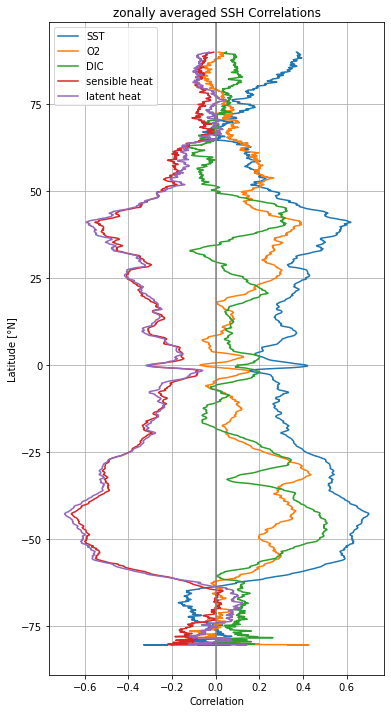

In [11]:
plt.figure(figsize=(6,12))
ds_corr_xmean.corr_ssh_SST.plot(y='yt_ocean', label='SST')
ds_corr_xmean.corr_ssh_o2_stf.plot(y='yt_ocean', label='O2')
ds_corr_xmean.corr_ssh_dic_stf.plot(y='yt_ocean', label='DIC')
ds_corr_xmean.corr_ssh_sens_heat.plot(y='yt_ocean', label='sensible heat')
ds_corr_xmean.corr_ssh_evap_heat.plot(y='yt_ocean', label='latent heat')
plt.axvline(0, c='gray')
plt.title('zonally averaged SSH Correlations')
plt.grid()
plt.legend()
plt.ylabel('Latitude [°N]')
plt.xlabel('Correlation')
plt.savefig(pathp+'3x3box_zonalmeancorr_monthly_0181-0190.png', bbox_inches="tight", dpi=300)

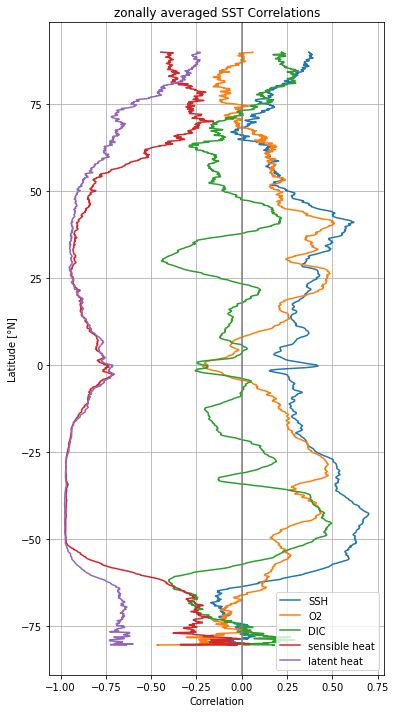

In [12]:
plt.figure(figsize=(6,12))
ds_corr_xmean.corr_sst_SSH.plot(y='yt_ocean', label='SSH')
ds_corr_xmean.corr_sst_o2_stf.plot(y='yt_ocean', label='O2')
ds_corr_xmean.corr_sst_dic_stf.plot(y='yt_ocean', label='DIC')
ds_corr_xmean.corr_sst_sens_heat.plot(y='yt_ocean', label='sensible heat')
ds_corr_xmean.corr_sst_evap_heat.plot(y='yt_ocean', label='latent heat')
plt.axvline(0, c='gray')
plt.title('zonally averaged SST Correlations')
plt.grid()
plt.legend()
plt.ylabel('Latitude [°N]')
plt.xlabel('Correlation')
plt.savefig(pathp+'3x3box_zonalmeancorr_sst_monthly_0181-0190.png', bbox_inches="tight", dpi=300)

### seasonal correlation

In [ ]:
###control
#seas=xr.open_dataset(pathf+'3x3box_corr_seasonally_0181-0190.nc')
### Climate Change
seas=xr.open_dataset(pathf+'3x3box_corr_seasonally_1PctTo2X_0181-0190.nc')
seas=fix_grid(seas)

In [ ]:
###SSH corrs
def seasonal_plotting(season):
    fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,7),subplot_kw={'projection': ccrs.PlateCarree()})
    axs=axs.flatten()
    im =seas.sel(season=season).corr_ssh_SST.plot.contourf(ax=axs[0], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
    seas.sel(season=season).corr_ssh_sens_heat.plot.contourf(ax=axs[3], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
    seas.sel(season=season).corr_ssh_evap_heat.plot.contourf(ax=axs[4], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
    seas.sel(season=season).corr_ssh_o2_stf.plot.contourf(ax=axs[1], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
    seas.sel(season=season).corr_ssh_dic_stf.plot.contourf(ax=axs[2], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
    axs[5].set_axis_off()
    
    for i in range(5):
        gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=1, color='black', alpha=0)
        gl.xlabels_top = False
        gl.ylabels_left = False
        axs[i].coastlines()
    
    cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    
    axs[0].set_title('Corr SSH-SST '+ season);
    axs[3].set_title('Corr SSH-sensible heat '+ season);
    axs[4].set_title('Corr SSH-latent heat '+ season);
    axs[1].set_title('Corr SSH-O2 flux '+ season);
    axs[2].set_title('Corr SSH-DIC flux '+ season);
    
    plt.savefig(pathp+'3x3box_corr_seasonally_'+season+'_1PctTo2X_0181-0190.png', bbox_inches="tight", dpi=300)
    #plt.savefig(pathp+'3x3box_corr_seasonally_'+season+'_0181-0190.png', bbox_inches="tight", dpi=300)

In [ ]:
seasonal_plotting('DJF')
seasonal_plotting('MAM')
seasonal_plotting('SON')
seasonal_plotting('JJA')

### for each variable independently

In [ ]:
for var in list(seas.keys()):
    fig, axs= plt.subplots(nrows=2, ncols=2 , figsize=(15,7),subplot_kw={'projection': ccrs.PlateCarree()})
    axs=axs.flatten()
    im=seas.sel(season='DJF')[var].plot.contourf(ax=axs[0], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
    seas.sel(season='MAM')[var].plot.contourf(ax=axs[1], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
    seas.sel(season='JJA')[var].plot.contourf(ax=axs[2], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
    seas.sel(season='SON')[var].plot.contourf(ax=axs[3], x='geolon_t', y='geolat_t', vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
    
    for i in range(4):
        gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=1, color='black', alpha=0)
        gl.xlabels_top = False
        gl.ylabels_right = False
        axs[i].coastlines()
    
    cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    
    axs[0].set_title('DJF '+var);
    axs[1].set_title('MAM '+var);
    axs[2].set_title('JJA '+var);
    axs[3].set_title('SON '+var);
    
    plt.subplots_adjust(hspace=0.2, wspace=0.1)
    #plt.savefig(pathp+'3x3box_'+var+'_seasonally_0181-0190.png', bbox_inches="tight", dpi=300)
    plt.savefig(pathp+'3x3box_'+var+'_seasonally_1PctTo2X_0181-0190.png', bbox_inches="tight", dpi=300)

## month 1


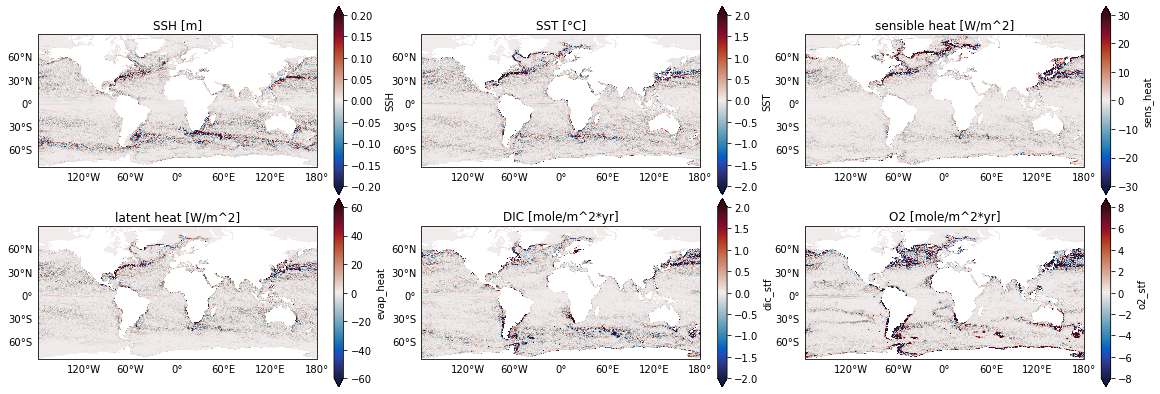

In [48]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(20,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
dsa.isel(month=0).SSH.plot(ax=axs[0], vmin=-.2, vmax=.2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(month=0).SST.plot(ax=axs[1], vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(month=0).sens_heat.plot(ax=axs[2], vmin=-30, vmax=30, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(month=0).evap_heat.plot(ax=axs[3], vmin=-60, vmax=60, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(month=0).dic_stf.plot(ax=axs[4], vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(month=0).o2_stf.plot(ax=axs[5], vmin=-8, vmax=8, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)

for i in range(6):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_right = False


axs[0].set_title('SSH [m]');
axs[1].set_title('SST [°C]');
axs[2].set_title('sensible heat [W/m^2]');
axs[3].set_title('latent heat [W/m^2]');
axs[4].set_title('DIC [mole/m^2*yr]');
axs[5].set_title('O2 [mole/m^2*yr]');

plt.subplots_adjust(hspace=0.02, wspace=0.1)
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_ano_month1.png', bbox_inches="tight", dpi=300)

## scatter

In [4]:
def scattering(var, spatial, label, filename): ##var =SST, sens_heat, evap_heat
    corr=np.round(xr.corr(sst[:, ::spatial, ::spatial], var[:, ::spatial, ::spatial]).values, 2)
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.scatter(sst[:, ::spatial, ::spatial].values.flatten(), 
                var[:, ::spatial, ::spatial].values.flatten(),
               color='gray', marker='x', label='correlation raw: '+str(corr))
    plt.xlabel('SST [°C]', fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.title('Anomalies', fontsize=23)
    plt.legend(loc=2, fontsize=20)
    #plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/scatters/3x3_boxcar_global_scatter_SST_'+filename+'_monthly.png', dpi=300)


### global

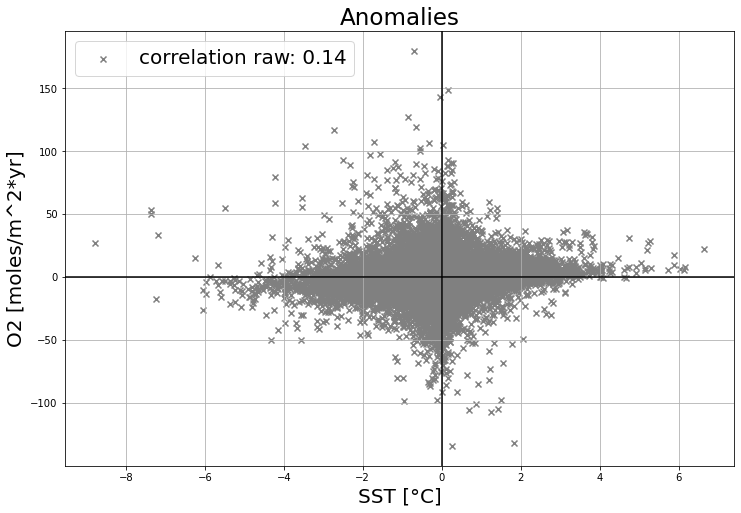

In [11]:
scattering(o2, 10, 'O2 [moles/m^2*yr]', 'o2')

### binned

In [8]:
def scattering(ds, var, spatial, label, filename): ##var =SST, sens_heat, evap_heat
    sst_var=xr.merge([ds.SSH, ds[var]])
    sst_var_b=sst_var.groupby_bins(sst_var.SSH, 10)
    bins=sst_var_b.mean('stacked_month_yt_ocean_xt_ocean')
    
    corr=np.round(xr.corr(ds.SSH[:, ::spatial, ::spatial], ds[var][:, ::spatial, ::spatial]).values, 2)
    corr_bins=np.round(xr.corr(bins.SSH, bins[var]).values, 2)

    
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.scatter(ds.SSH[:, ::spatial, ::spatial].values.flatten(), 
                ds[var][:, ::spatial, ::spatial].values.flatten(),
               color='gray', marker='x', label='correlation raw: '+str(corr))
    for i, item in enumerate(bins.SSH_bins.values):
        if i==1:
            plt.hlines(bins[var][i], xmin=item.left, xmax=item.right, color='red', label='correlation binned: '+str(corr_bins))
        else:
            plt.hlines(bins[var][i], xmin=item.left, xmax=item.right, color='red')


    
    plt.xlabel('SSH [m]', fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.title('Anomalies', fontsize=23)
    plt.legend(loc=2, fontsize=20)
    plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/scatters/3x3_boxcar_global_scatterbinned_SSH_'+filename+'_monthly.png', dpi=300)


In [ ]:
scattering(dsa, 'SST', 20, 'SST [°C]', 'sst')
scattering(dsa, 'sens_heat', 20, 'sensible heat [W/m^2]', 'sh')
scattering(dsa, 'evap_heat', 20, 'latent heat [W/m^2]', 'lh')
scattering(dsa, 'dic_stf', 20, 'CO2 [moles/(m^2*yr)]', 'dic')
scattering(dsa, 'o2_stf', 20, 'O2', 'o2')

### Correlation O2 and DIC

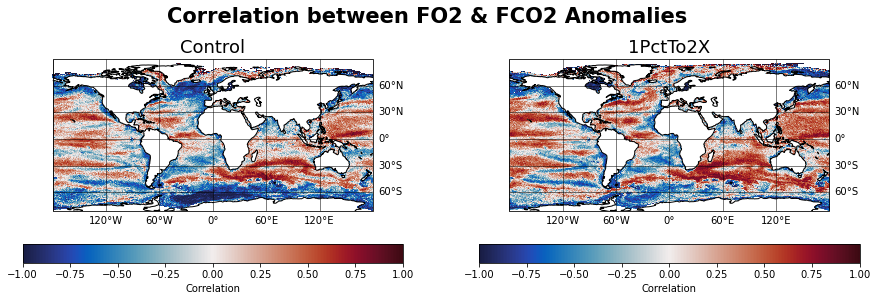

In [20]:
fig, axs= plt.subplots(nrows=1, ncols=2 , figsize=(15,4),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
ds.corr_o2_stf_dic_stf_ctrl.plot(ax=axs[0],vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation",'extend':None})
ds.corr_o2_stf_dic_stf_1PctTo2X.plot(ax=axs[1], vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation", 'extend':None})


for i in range(2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Control', fontsize=18);
axs[1].set_title('1PctTo2X', fontsize=18);
plt.suptitle('Correlation between FO2 & FCO2 Anomalies', fontweight='bold', fontsize=21, y=1.06);
plt.savefig(pathp+'co2_o2_corr.png', dpi=300, bbox_inches='tight');